In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')

%matplotlib inline
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
null_val = df.isnull().describe()
values = [len(df) - x for x in null_val.loc['freq',:]]
values


[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 204, 2]

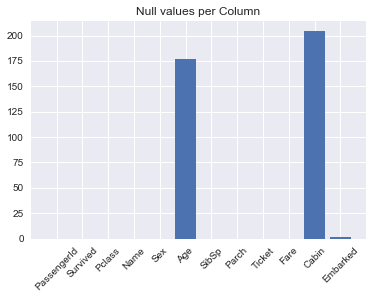

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(len(df.columns)),values, tick_label = df.columns)
xTickMarks = df.columns
ax.set_title('Null values per Column')
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.show()

The Cabin column has the most empty values with 204 nulls.

In [5]:
df.dropna(subset= ['Embarked'], inplace=True)

In [6]:
df['Cabin'].fillna("¯\(ツ)/¯", inplace=True)

In [7]:
df['FamilyCount'] = df.SibSp + df.Parch

In [8]:
reverends = [1 if "Rev." in i else 0 for i in df.Name]

df["IsReverend"] = reverends

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [10]:
emb_dummies = pd.get_dummies(df.Embarked, prefix='Embarked')
emb_dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [11]:
sex_dummies = pd.get_dummies(df.Sex, prefix='Sex')
sex_dummies.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
df = pd.concat([df,emb_dummies], axis=1)

In [13]:
df = pd.concat([df,sex_dummies], axis=1)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1


In [15]:
survival_rate = df.Survived.mean()
"The overall survival rate was {:.2f}%".format(survival_rate * 100)

'The overall survival rate was 38.25%'

In [16]:
#Survival function for columns that have a bool field, enter col as string
def survival_rate(df,col):
    return df.loc[df[col] == 1,'Survived'].mean()

In [38]:
survival_men = survival_rate(df,'Sex_male')
"The survival rate of men was {:.2f}%".format(survival_men * 100)

'The survival rate of men was 18.89%'

In [18]:
survival_women = survival_rate(df,'Sex_female')
"The survival rate of women was {:.2f}%".format(survival_women * 100)

'The survival rate of women was 74.04%'

In [19]:
survival_cabin_null = df.loc[df['Cabin'].str.startswith('¯'),'Survived'].mean()
"The survival rate of passengers with no cabin data was {:.2f}%".format(survival_cabin_null * 100)

'The survival rate of passengers with no cabin data was 29.99%'

In [20]:
survival_age_null = df.loc[df['Age'].isnull(),'Survived'].mean()
"The survival rate of passengers with no age data was {:.2f}%".format(survival_age_null * 100)

'The survival rate of passengers with no age data was 29.38%'

In [21]:
survival_embC = survival_rate(df,'Embarked_C')
survival_embQ = survival_rate(df,'Embarked_Q')
survival_embS = survival_rate(df,'Embarked_S')
print'''Embarked from C survival rate {:.2f}%
Embarked from Q survival rate {:.2f}% 
Embarked from S survival rate {:.2f}%   
'''.format(survival_embC*100, survival_embQ*100, survival_embS*100)

Embarked from C survival rate 55.36%
Embarked from Q survival rate 38.96% 
Embarked from S survival rate 33.70%   



In [39]:
under_16 = df.loc[df['Age'] < 16, 'Pclass'].value_counts()
under_16

3    58
2    19
1     6
Name: Pclass, dtype: int64

In [36]:
u12_survival_per_class = [df.loc[(df['Age'] < 16) & (df['Pclass'] == x),'Survived'].mean() for x in range(1,4)]
print'''Under 16 1st class survival rate {:.2f}%
Under 16 2nd class survival rate {:.2f}%
Under 16 3rd class survival rate {:.2f}%
'''.format(u12_survival_per_class[0]*100,u12_survival_per_class[1]*100,u12_survival_per_class[2]*100)

Under 16 1st class survival rate 83.33%
Under 16 2nd class survival rate 100.00%
Under 16 3rd class survival rate 43.10%



The Captain of the R.M.S Titanic was Edward John Smith, he did not survive and he is not on this list.

In [24]:
rich_dead_person = df.loc[df['Survived'] == 0,'Fare'].max()
df.loc[(df['Fare'] == rich_dead_person) & (df['Survived'] == 0),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1


In [25]:
survival_family_on_board = df.loc[df['FamilyCount'] >0,'Survived'].mean()
"The survival rate of passengers with family on board was {:.2f}%".format(survival_family_on_board * 100)

'The survival rate of passengers with family on board was 50.56%'

Looks like you might of had a 50-50 shot.

In [40]:
o16_survival_per_class = [df.loc[(df['Age'] > 16) & (df['Pclass'] == x),'Survived'].mean() for x in range(1,4)]
print'''1st class survival rate {:.2f}%
2nd class survival rate {:.2f}%
3rd class survival rate {:.2f}%
'''.format(o12_survival_per_class[0]*100,o12_survival_per_class[1]*100,o12_survival_per_class[2]*100)

1st class survival rate 65.00%
2nd class survival rate 42.31%
3rd class survival rate 21.17%



## 

In [41]:
female_o16_survival_per_class= [df.loc[(df['Age'] > 16) & (df['Pclass'] == x) & (df['Sex_female'] ==1),'Survived'].mean() for x in range(1,4)]
print'''Female 1st class survival rate {:.2f}%
Female 2nd class survival rate {:.2f}%
Female 3rd class survival rate {:.2f}%
'''.format(female_o16_survival_per_class[0]*100,female_o16_survival_per_class[1]*100,female_o16_survival_per_class[2]*100)

Female 1st class survival rate 97.40%
Female 2nd class survival rate 90.62%
Female 3rd class survival rate 42.03%



In [42]:
male_o16_survival_per_class= [df.loc[(df['Age'] > 16) & (df['Pclass'] == x) & (df['Sex_female'] ==0),'Survived'].mean() for x in range(1,4)]
print'''Male 1st class survival rate {:.2f}%
Male 2nd class survival rate {:.2f}%
Male 3rd class survival rate {:.2f}%
'''.format(male_o16_survival_per_class[0]*100,male_o16_survival_per_class[1]*100,male_o16_survival_per_class[2]*100)

Male 1st class survival rate 37.76%
Male 2nd class survival rate 6.82%
Male 3rd class survival rate 12.96%



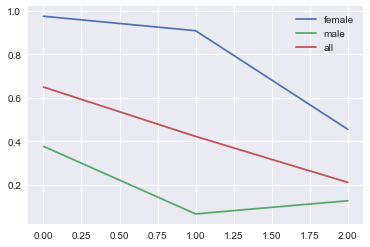

In [29]:
plt.plot(female_o12_survival_per_class, label='female')
plt.plot(male_o12_survival_per_class, label = 'male')
plt.plot(o12_survival_per_class, label = 'all')
plt.legend()

In [43]:
df2 = df['Age'].fillna(df['Age'].mean())

In [44]:
df['Age'].mean()

29.64209269662921

In [31]:
df['Age_filled'] = df2

In [32]:
header = df.describe()
who = [index for index in header]
who.remove('Age')
who


['PassengerId',
 'Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'FamilyCount',
 'IsReverend',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_female',
 'Sex_male',
 'Age_filled']

In [67]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_filled,Person
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,...,S,0,1,0,0,1,0,1,27.000000,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,...,S,0,0,0,0,1,1,0,19.000000,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,...,S,3,0,0,0,1,1,0,29.642093,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,...,C,0,0,1,0,0,0,1,26.000000,male
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,...,Q,0,0,0,1,0,0,1,32.000000,male


In [34]:
df.to_csv('titanic_train_cleaned.csv')

In [45]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [70]:
df['Person'] = df[['Age_filled','Sex']].apply(get_person,axis=1)


In [74]:
x = pd.crosstab(df['Person'],[df['Pclass'],df['Survived']])
x

Pclass     1       2        3    
Survived   0   1   0   1    0   1
Person                           
child      1   5   0  19   33  25
female     2  87   6  60   58  56
male      77  42  91   8  281  38

In [72]:
len(df)

889

In [60]:
x.to_csv('query_1.csv')

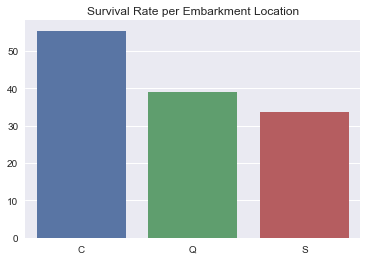

In [32]:
x = ['C','Q','S']
y = [survival_embC*100,survival_embQ*100,survival_embS*100]
sns.barplot(x,y)
sns.plt.title('Survival Rate per Embarkment Location')

In [33]:
from collections import Counter
cabins = ['N' if s == "¯\(ツ)/¯" else s[0] for s in df.Cabin]
df['Cabin_Area'] = cabins


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_filled,Cabin_Area
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0,0,0,1,0,1,22.0,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,1,0,0,1,0,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,0,1,1,0,26.0,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,0,0,0,1,1,0,35.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,0,1,0,1,35.0,N


In [35]:
survival_per_cabin = [df.loc[df['Cabin_Area'] == x,'Survived'].mean() * 100 for x in ['A','B','C','N']]

In [36]:
survival_per_cabin

[46.666666666666664, 73.33333333333333, 59.32203389830508, 29.985443959243085]

In [37]:
survival_per_cabin_female = [df.loc[(df['Cabin_Area'] == x) & (df['Sex_female'] == 1),'Survived'].mean() * 100 for x in ['A','B','C','N']]

## 1st class Females with Cabin information had a high sruvival rate as well

In [38]:
survival_per_cabin_female

[100.0, 100.0, 88.88888888888889, 65.43778801843318]

In [39]:
mean_fare = [df.loc[df['Cabin_Area'] == x,'Fare'].mean() for x in ['A','B','C','D', 'E', 'F', 'G', 'N']]
mean_fare

[39.623886666666664,
 114.9949088888889,
 100.15134067796612,
 57.24457575757576,
 46.026693749999986,
 18.69679230769231,
 13.58125,
 19.1573253275109]

In [40]:
df.loc[df.Pclass == 1,'Cabin_Area'].value_counts()

C    59
B    45
N    40
D    29
E    25
A    15
T     1
Name: Cabin_Area, dtype: int64

In [45]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'FamilyCount', u'IsReverend', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Sex_female', u'Sex_male', u'Age_filled', u'Cabin_Area',
       u'Name_length'],
      dtype='object')

In [42]:
df['Name_length'] = df['Name'].apply(lambda i: len(i))
df['Name_length'].max()

82

In [43]:
survival_name_length = [df.loc[df['Name_length'] > length,'Survived'].mean() for length in [0,10,20,30,40,50,60,70,80]]
survival_name_length

[0.38245219347581555,
 0.38245219347581555,
 0.44049459041731065,
 0.6244343891402715,
 0.797752808988764,
 0.8,
 1.0,
 1.0,
 1.0]

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_filled,Cabin_Area,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,1,0,1,22.0,N,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,0,1,0,38.0,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,1,0,26.0,N,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,1,1,0,35.0,C,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,1,35.0,N,24
